## ANALISI DATASET ORIGINALE DEL 1987

Modelli analizzati: naive Bayes, logistic regression, decision Tree, random forest



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import make_scorer, fbeta_score

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import tensorflow as tf
#import tensorflow as tf
from tensorflow import keras

from sklearn.linear_model import Lasso, LassoCV


2025-02-11 20:40:24.321082: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-11 20:40:24.331737: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-11 20:40:24.428584: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-11 20:40:24.535236: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739302824.606600  196132 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739302824.62

In [3]:
# import data .data file
data = pd.read_csv('MUSHROOM 8000/agaricus-lepiota.data', header=None)

In [4]:
data.shape

(8124, 23)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
# print data unique values
for i in range(0, data.shape[1]):
    print(data[i].unique())

['p' 'e']
['x' 'b' 's' 'f' 'k' 'c']
['s' 'y' 'f' 'g']
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
['t' 'f']
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
['f' 'a']
['c' 'w']
['n' 'b']
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
['e' 't']
['e' 'c' 'b' 'r' '?']
['s' 'f' 'k' 'y']
['s' 'f' 'y' 'k']
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
['p']
['w' 'n' 'o' 'y']
['o' 't' 'n']
['p' 'e' 'l' 'f' 'n']
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
['s' 'n' 'a' 'v' 'y' 'c']
['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [7]:
data = data.drop([16], axis=1)

In [8]:
for i in range(0, data.shape[1]):
    if i != 16:
        print(data[i].unique())

['p' 'e']
['x' 'b' 's' 'f' 'k' 'c']
['s' 'y' 'f' 'g']
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
['t' 'f']
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
['f' 'a']
['c' 'w']
['n' 'b']
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
['e' 't']
['e' 'c' 'b' 'r' '?']
['s' 'f' 'k' 'y']
['s' 'f' 'y' 'k']
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
['w' 'n' 'o' 'y']
['o' 't' 'n']
['p' 'e' 'l' 'f' 'n']
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
['s' 'n' 'a' 'v' 'y' 'c']


Rimuoviamo colonna veil-type perchè ha solo un valore e non aiuta nella modellizzazione.


In [9]:
data.columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 
                'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number',
                'ring-type', 'spore-print-color', 'population', 'habitat']

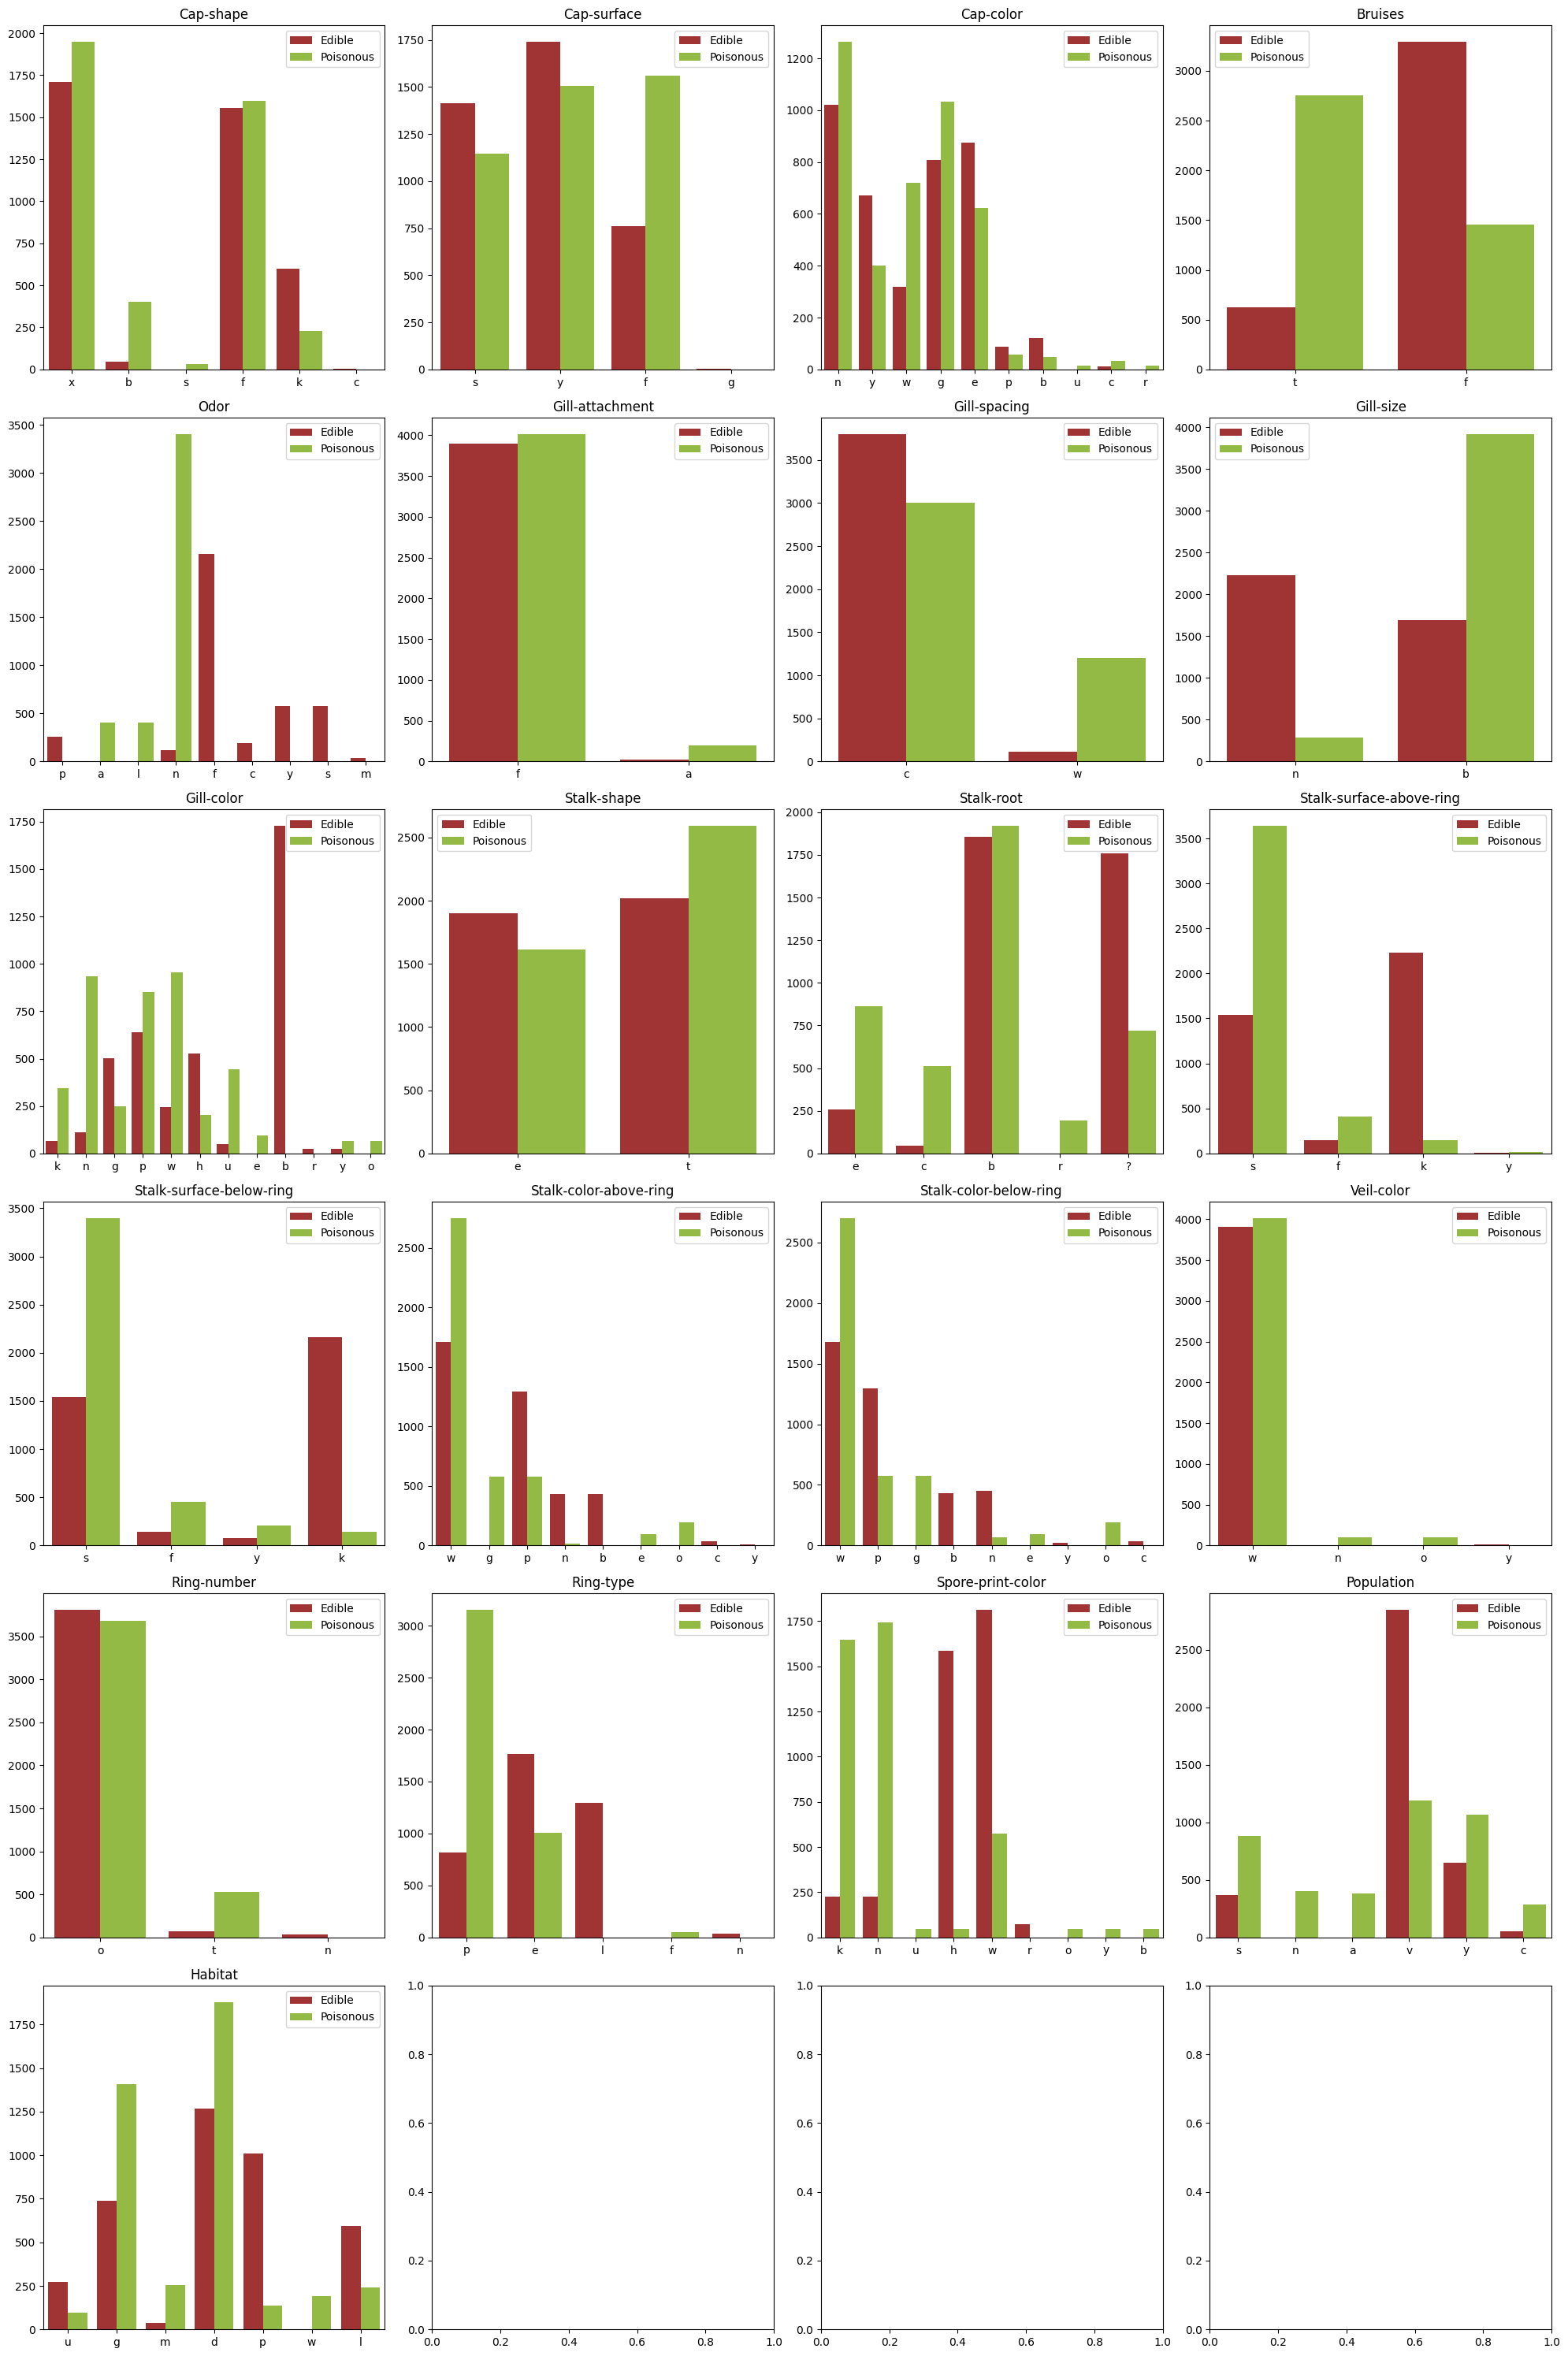

In [10]:
custom_palette = {'e': 'yellowgreen', 'p': 'firebrick'}


fig, axes = plt.subplots(6, 4, figsize=(20, 30))
axes = axes.flatten()
for i in range(1, len(data.columns)):
    sns.countplot(x=data.iloc[:, i], hue=data['class'], ax=axes[i - 1], palette=custom_palette)
    axes[i - 1].set_title(data.columns[i].capitalize())
    axes[i - 1].set_xlabel('')
    axes[i - 1].set_ylabel('')
    axes[i - 1].legend(['Edible', 'Poisonous'])
plt.tight_layout()
plt.show()

In [11]:
data['odor'].value_counts()

odor
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

<Axes: xlabel='odor', ylabel='count'>

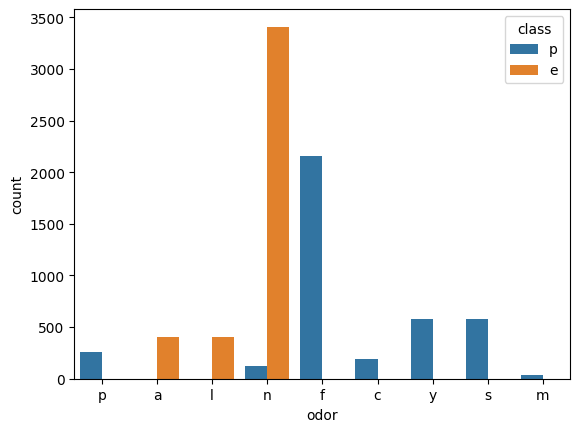

In [12]:
sns.countplot(x='odor', data=data, hue='class')

In [13]:
print(type(data))
data = pd.DataFrame(data)

<class 'pandas.core.frame.DataFrame'>


In [14]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [15]:
def label_encode(data, columns):
    encoders = {}
    for col in columns:
        encoder = LabelEncoder()
        #print(data[col])
        data[col] = encoder.fit_transform(data[col])
        #print('okk')
        encoders[col] = encoder
    return data

In [16]:
data_columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

In [17]:
df = label_encode(data, data_columns)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [18]:
df.shape

(8124, 22)

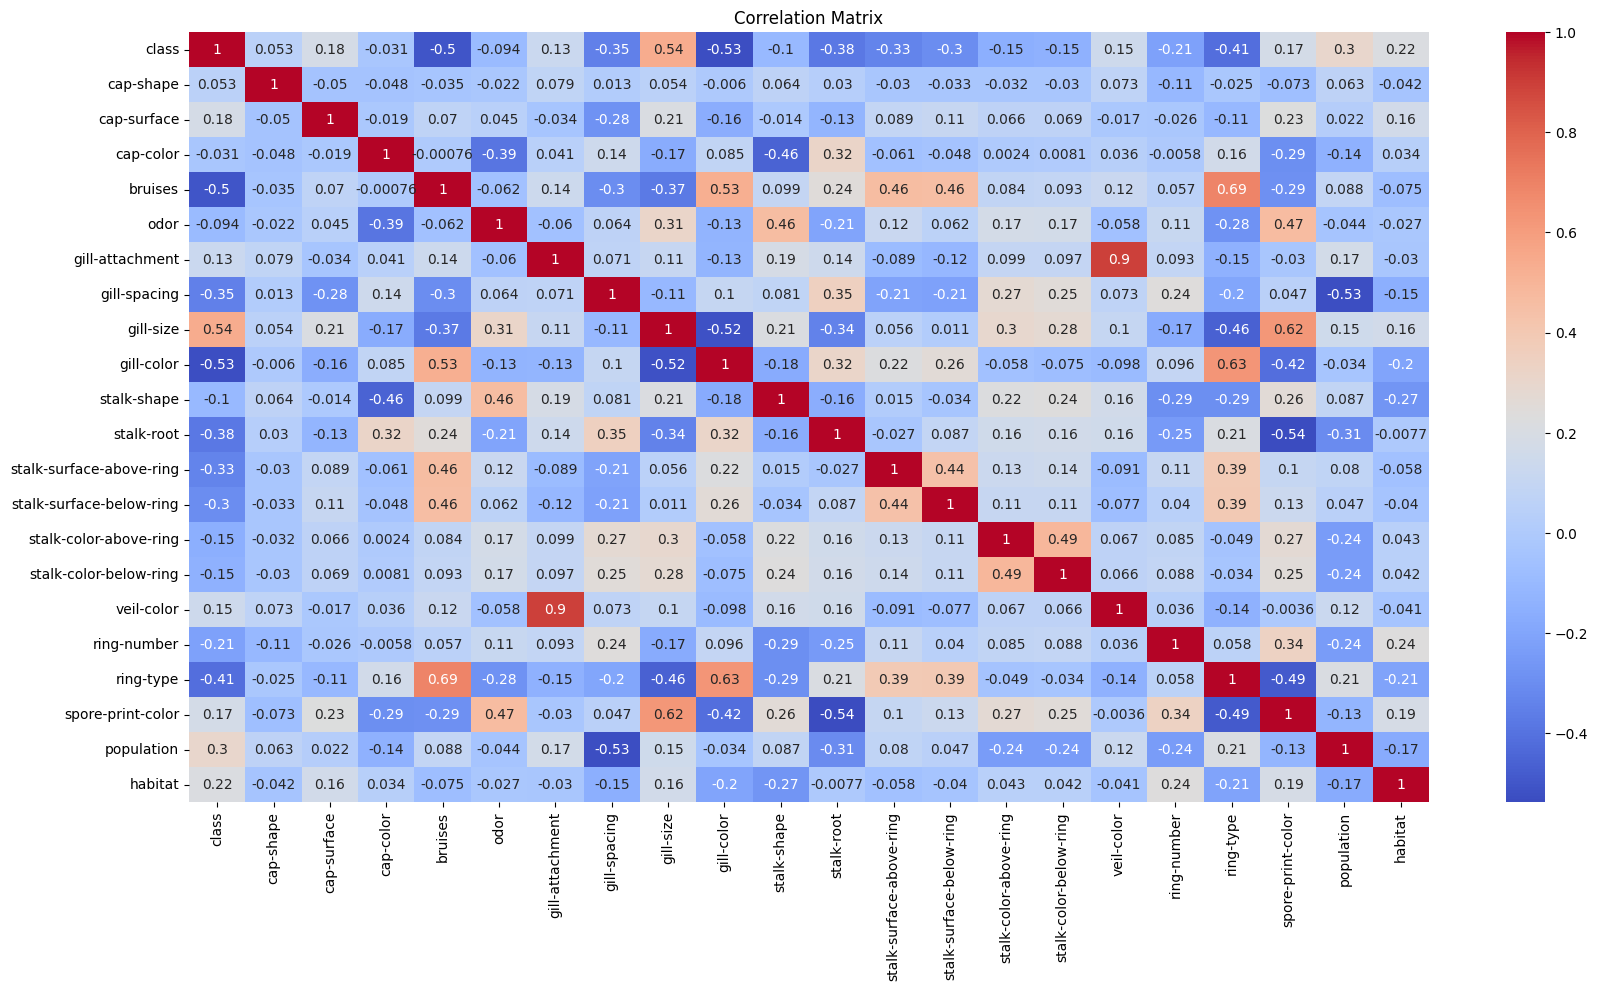

In [19]:
corr = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr,cmap= 'coolwarm' , annot=True)
plt.title('Correlation Matrix')
plt.show()

In [21]:
df['class'].value_counts() # 0: edible, 1: poisonous

class
0    4208
1    3916
Name: count, dtype: int64

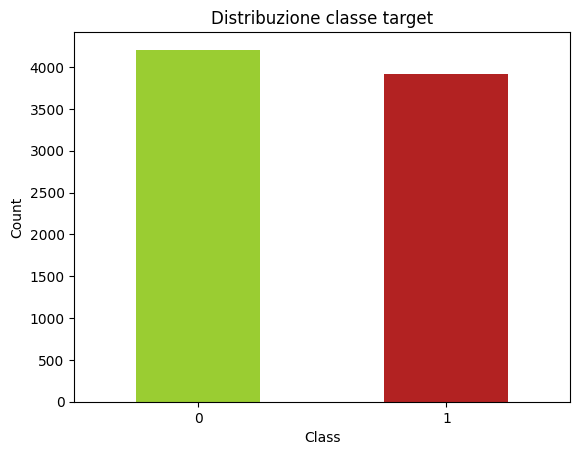

In [22]:
data['class'].value_counts().plot(kind='bar', color = ['yellowgreen', 'firebrick'])
plt.title('Distribuzione classe target')
plt.xticks(rotation=0)
plt.xlabel('Class')
plt.ylabel('Count')

plt.savefig("class_distribution.png", dpi=300, bbox_inches='tight')

plt.show()


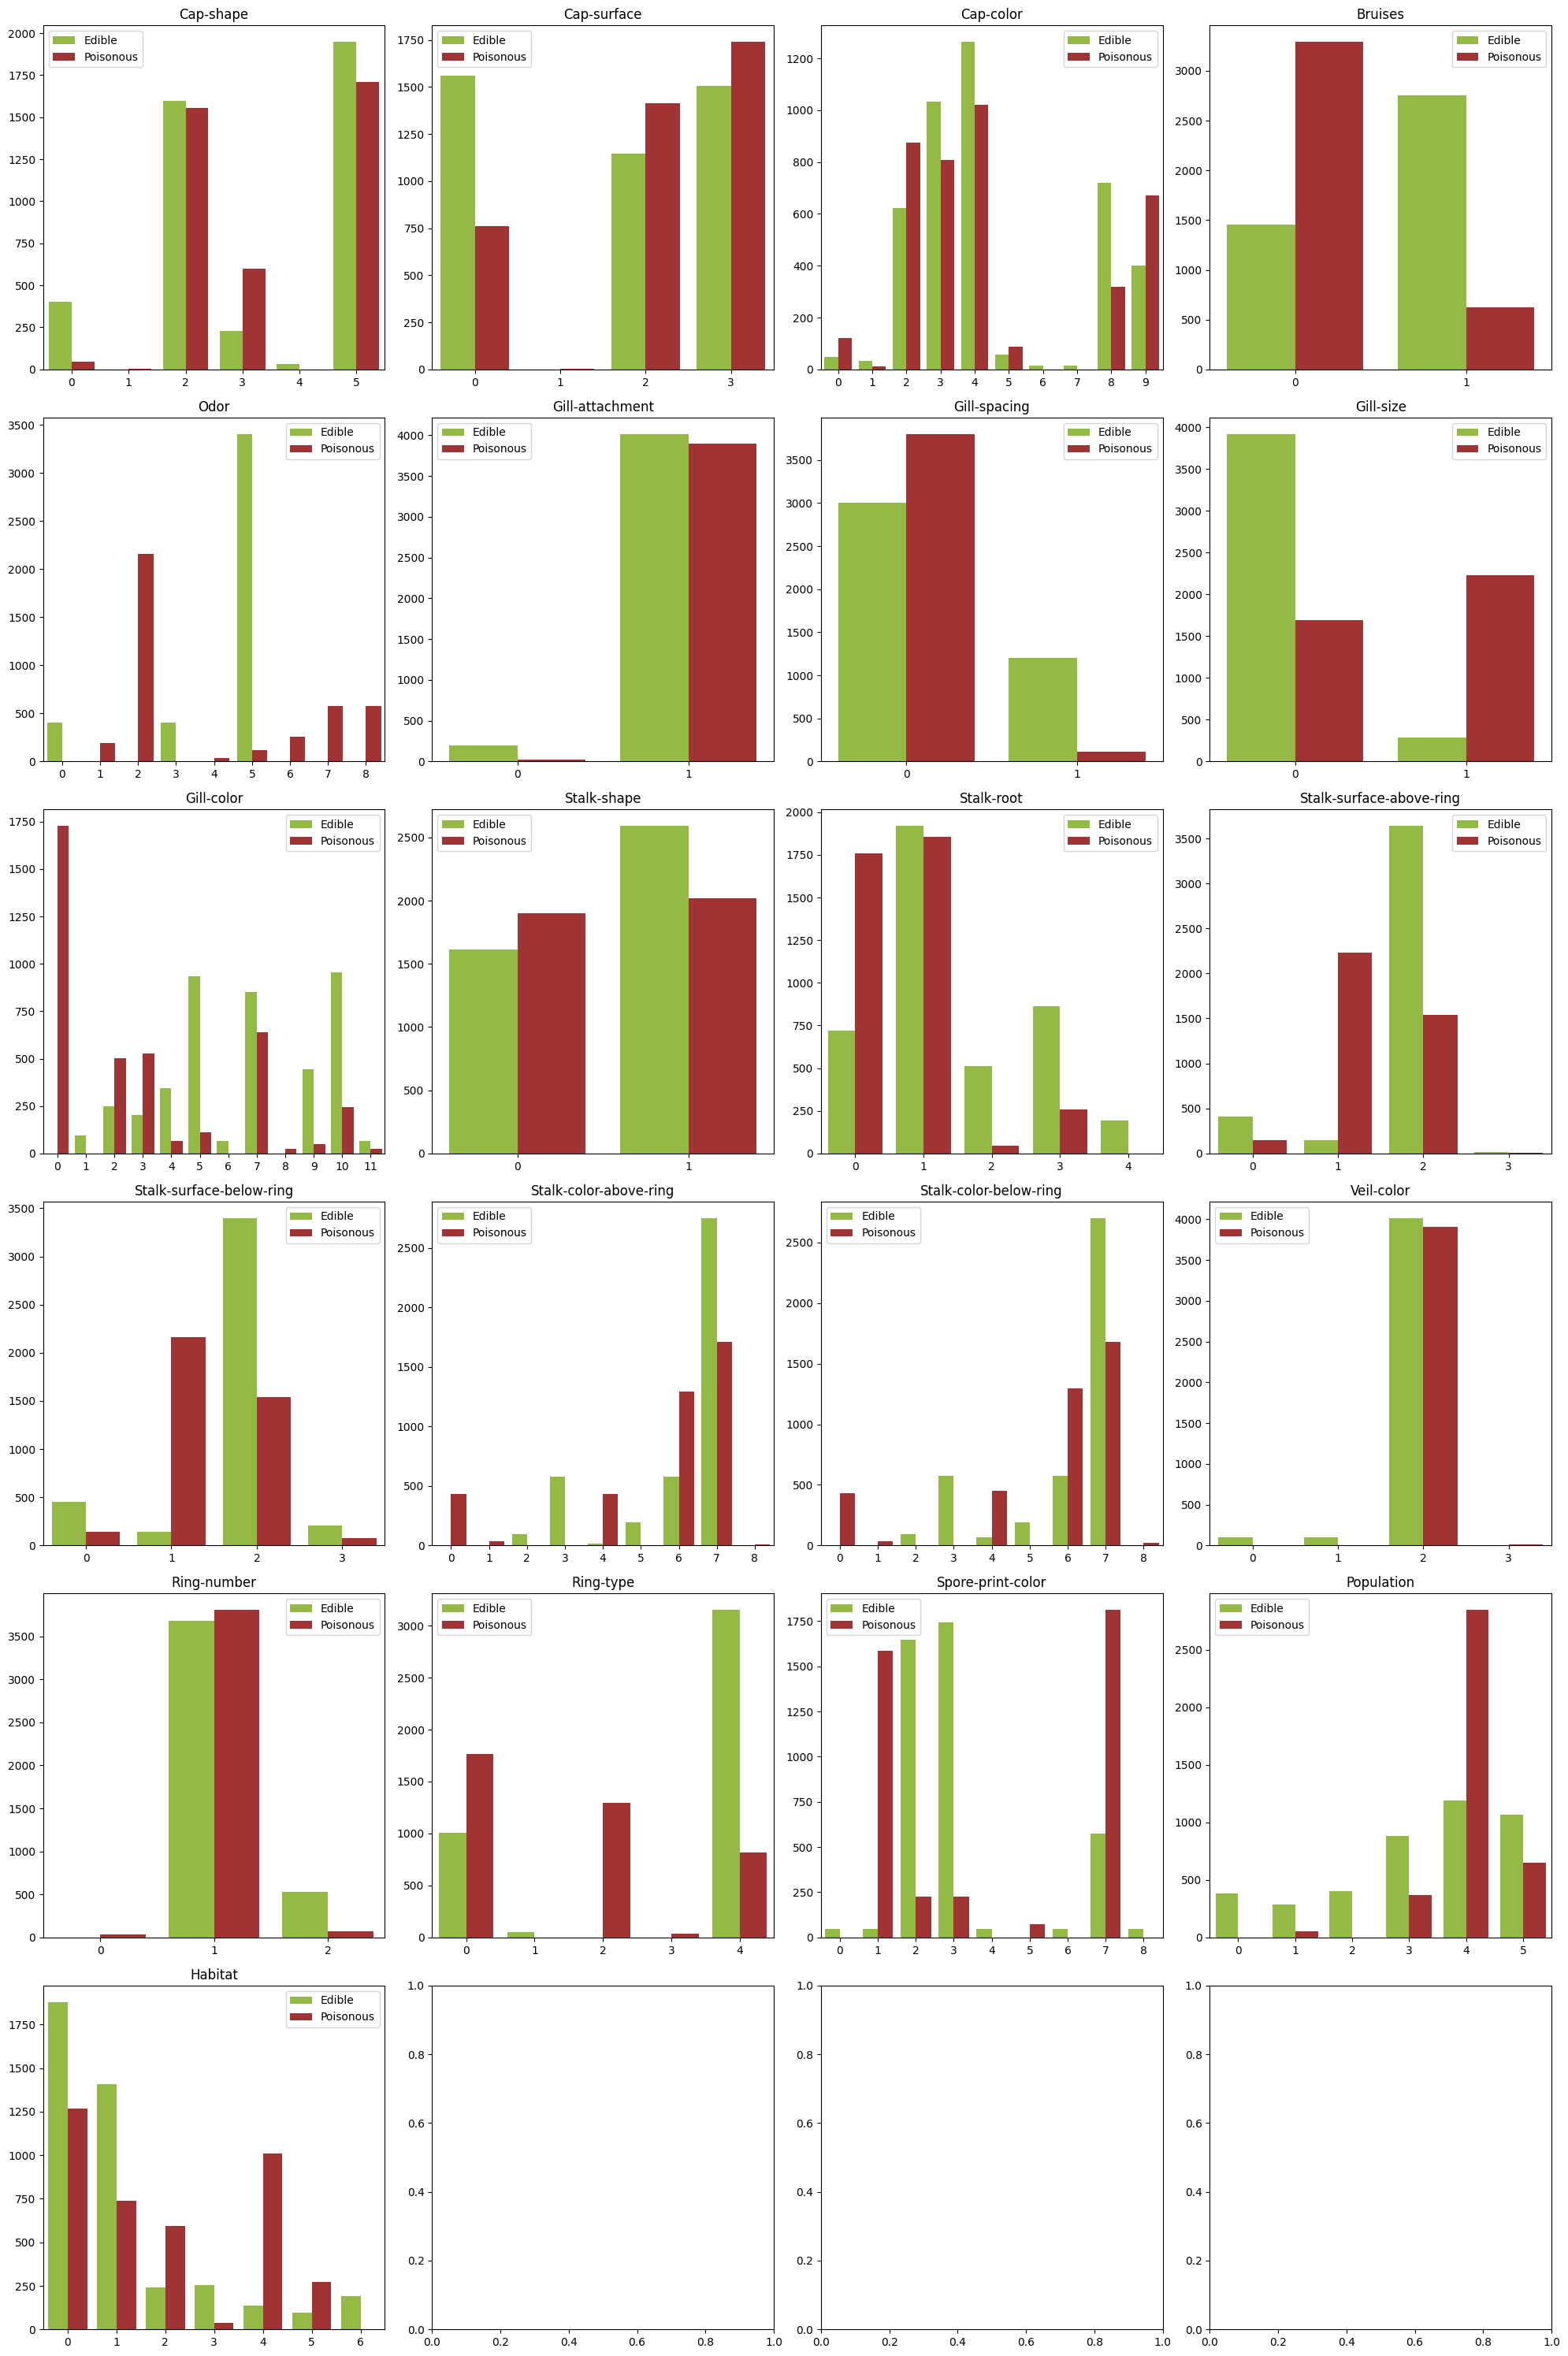

In [23]:
# plot of each feature with respect to class
custom_palette = {0: 'yellowgreen', 1: 'firebrick'}


fig, axes = plt.subplots(6, 4, figsize=(20, 30))
axes = axes.flatten()
for i in range(1, len(df.columns)):
    sns.countplot(x=df.iloc[:, i], hue=df['class'], ax=axes[i - 1], palette=custom_palette)
    axes[i - 1].set_title(df.columns[i].capitalize())
    axes[i - 1].set_xlabel('')
    axes[i - 1].set_ylabel('')
    axes[i - 1].legend(['Edible', 'Poisonous'])
plt.tight_layout()
plt.show()

### Feature selection

Uso 2 tecniche:
- Lasso regression
- Random Forest ()

Lasso regression

In [24]:
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43, shuffle=True)


In [25]:
alphas = np.logspace(-4, 1, 50)

lasso_cv = LassoCV(alphas=alphas, cv=10, random_state=42)  # 10-fold cross-validation
lasso_cv.fit(X_train, y_train)

best_alpha = lasso_cv.alpha_
print("Best alpha:", best_alpha)


Best alpha: 0.00040949150623804275


In [26]:
lasso = Lasso(alpha=best_alpha, random_state=42)
lasso.fit(X_train, y_train)

lasso_coef = lasso.coef_

feature_names = X.columns

selected_features = feature_names[lasso_coef != 0]

print("Selected features: ", selected_features)

Selected features:  Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


                     Feature  Coefficient  Abs Coefficient
7                  gill-size     0.523770         0.523770
6               gill-spacing    -0.451494         0.451494
15                veil-color     0.356015         0.356015
3                    bruises    -0.333801         0.333801
11  stalk-surface-above-ring    -0.159219         0.159219
10                stalk-root    -0.076391         0.076391
9                stalk-shape    -0.067081         0.067081
12  stalk-surface-below-ring    -0.056109         0.056109
18         spore-print-color    -0.046195         0.046195
1                cap-surface     0.023002         0.023002
4                       odor    -0.021810         0.021810
20                   habitat     0.017800         0.017800
17                 ring-type     0.015372         0.015372
13    stalk-color-above-ring    -0.010771         0.010771
8                 gill-color    -0.010422         0.010422
19                population    -0.007277         0.0072

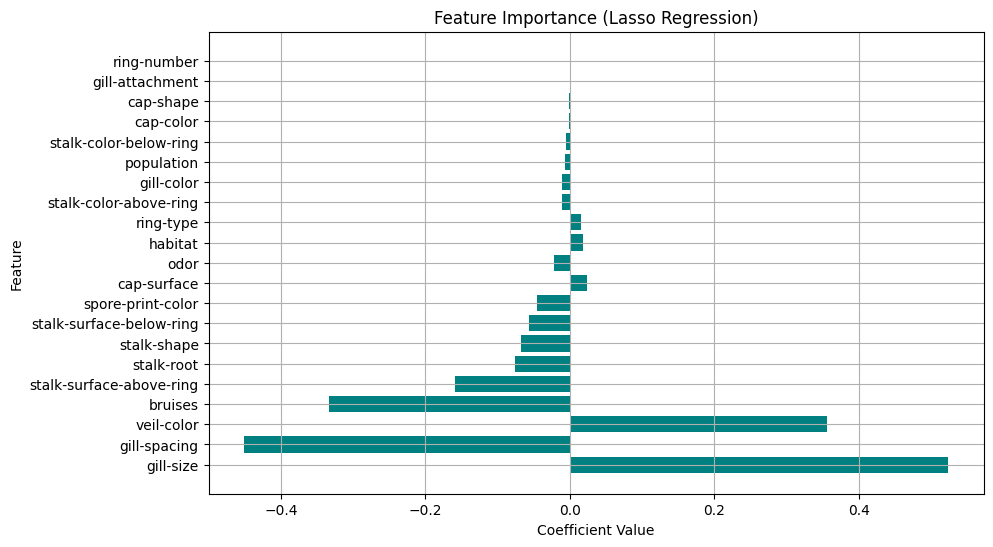

In [27]:
feature_names = X.columns

lasso = Lasso(alpha=best_alpha)

lasso.fit(X, y)

coefficients = lasso.coef_

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coef_df['Abs Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs Coefficient', ascending=False)

print(coef_df)

selected_features = coef_df[coef_df['Coefficient'] != 0]['Feature'].values
print("\nSelected features:", selected_features)

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='teal')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Lasso Regression)')
plt.grid(True)

plt.savefig("lasso_feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()

Random forest

In [28]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})

importance_df = importance_df.sort_values(by="Importance", ascending=False)

top_k = 10
selected_features = importance_df["Feature"].iloc[:top_k]
print("Selected Features:", list(selected_features))

Selected Features: ['odor', 'gill-color', 'gill-size', 'spore-print-color', 'ring-type', 'population', 'stalk-root', 'bruises', 'stalk-surface-above-ring', 'gill-spacing']


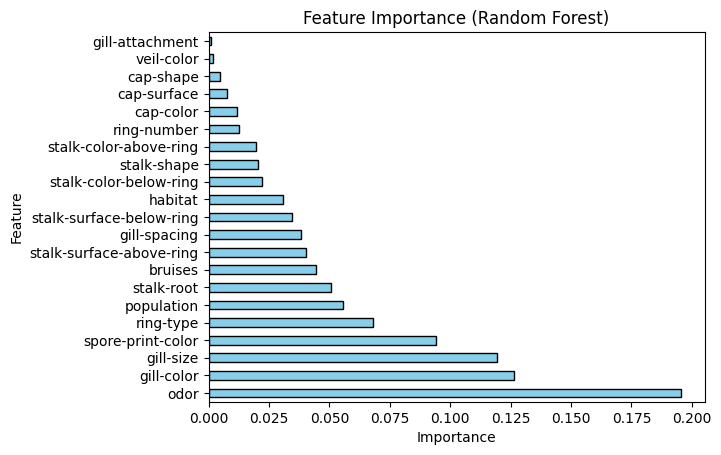

In [29]:
importance_df.plot.barh(x="Feature", y="Importance", color="skyblue", edgecolor="black", legend=None)


plt.title("Feature Importance (Random Forest)")
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.xticks(rotation=0)
plt.savefig("rf_feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()

Combino i risultati e tengo le seguenti 10 features.

In [30]:
best_features = ['odor', 'gill-color', 'gill-size', 'spore-print-color', 'ring-type', 
 'population', 'stalk-root', 'bruises', 'stalk-surface-above-ring', 'gill-spacing']

X_train = X_train[best_features]
X_test = X_test[best_features]


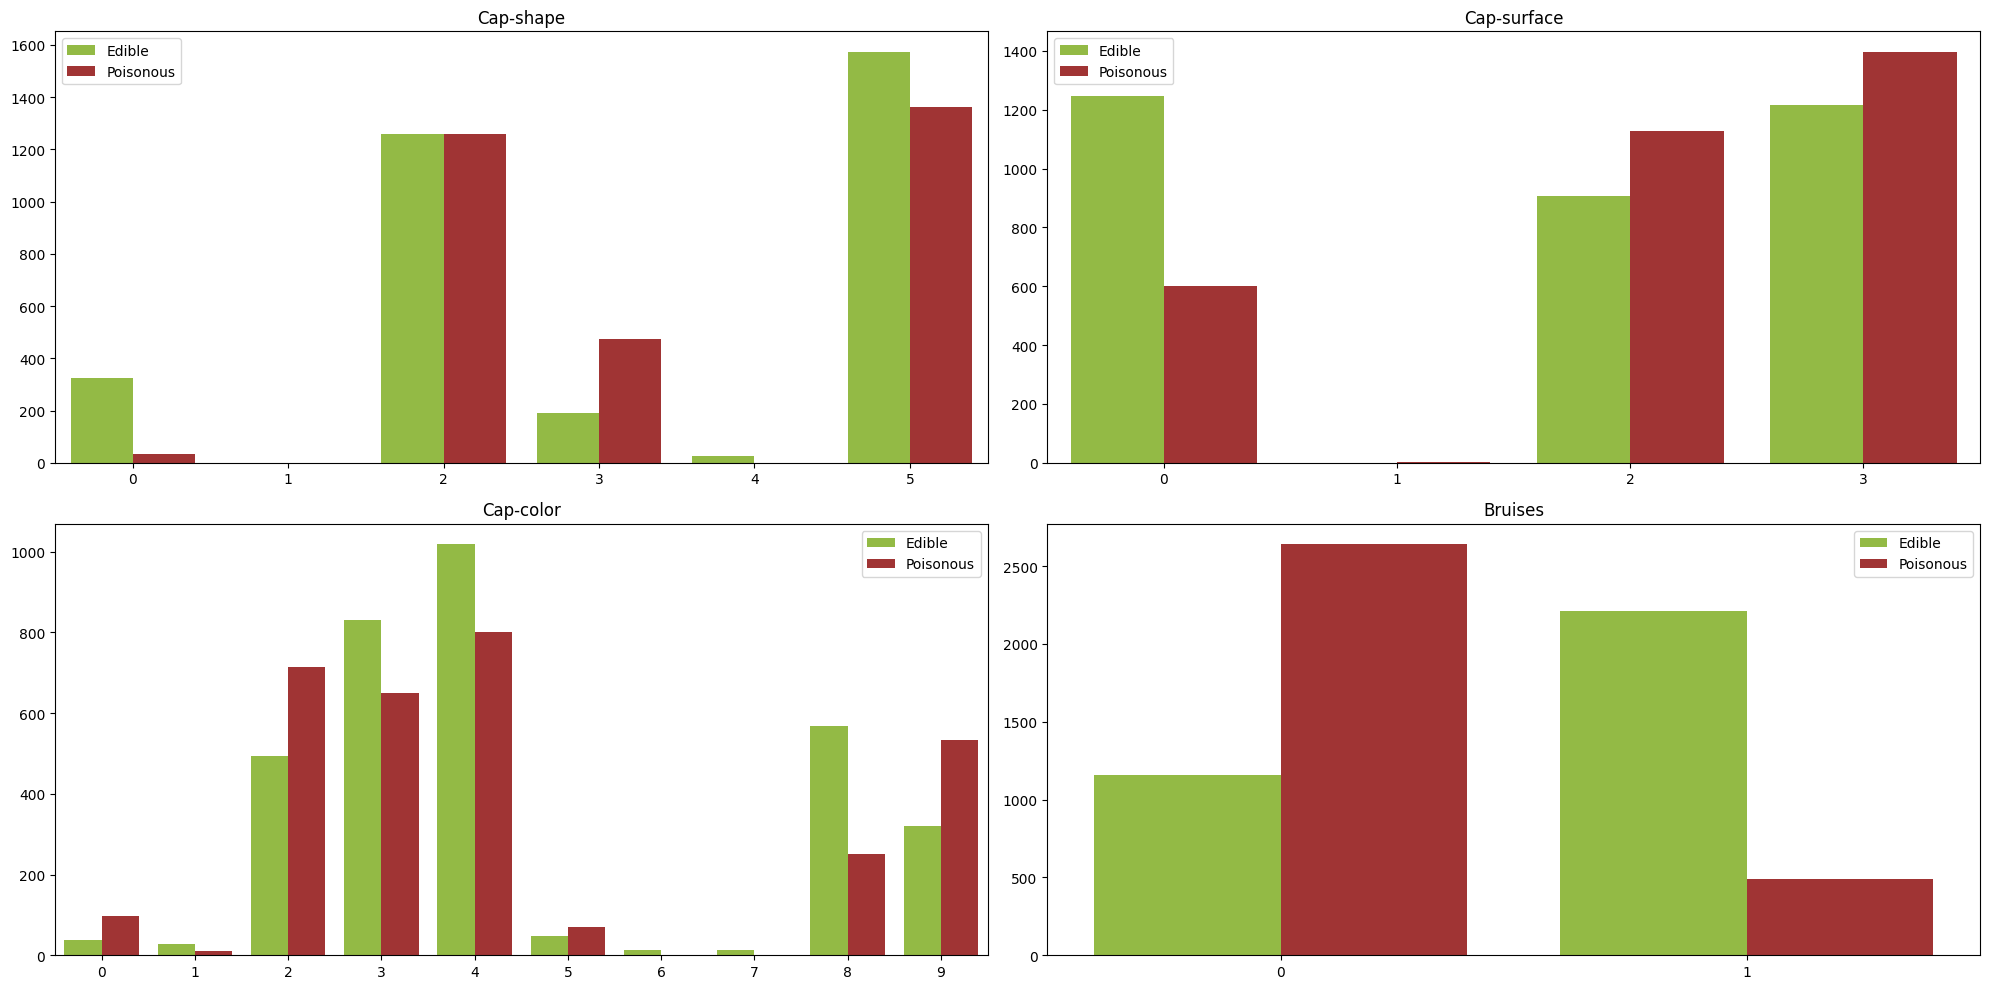

In [43]:
# plot first 4 features with respect to class
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes = axes.flatten()
for i in range(0, 4):
    sns.countplot(x=X_train.iloc[:, i], hue=y_train, ax=axes[i], palette=custom_palette)
    axes[i].set_title(X_train.columns[i].capitalize())
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].legend(['Edible', 'Poisonous'])
plt.tight_layout()
plt.savefig("selected_features.png", dpi=300, bbox_inches='tight')
plt.show()

## MODELLING

Partiamo da un baseline model che predice la classe più frequente, in questo caso il modello predirrà sempre come edibile. Ci aspettiamo un accuracy intorno al 50% dato che la variabile class è ben bilanciata.
Ovviamente questo tipo di modello non può essere utilizzato nella realtà in quanto classificare un fungo come sempre edibile è rischioso.

In [32]:
# baseline model
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43, shuffle=True)

In [33]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

print('Baseline Model Accuracy:', accuracy_score(y_test, dummy_pred))

Baseline Model Accuracy: 0.5150769230769231


### Naive Bayes

In [34]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Naive Bayes Model Accuracy:', accuracy)

Naive Bayes Model Accuracy: 0.9181538461538462


### Logistic regression

In [35]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

print('Logistic Regression Accuracy:', log_reg.score(X_test, y_test))

Logistic Regression Accuracy: 0.9464615384615385


### Linear Discriminant Analysis

In [36]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_lda, y_train)

# Make Predictions
y_pred = clf.predict(X_test_lda)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9489230769230769


5-fold cross validation su modello Random Forest.

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [38]:
def cross_validate_model(model, param_grid, model_name, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    train_accuracy = accuracy_score(y_train, best_model.predict(X_train))

    print(f"Best parameters for {model_name}: {best_params}")
    print(f"Best cross-validation accuracy for {model_name}: {best_score}")

    return best_model, best_params, best_score, train_accuracy
def display_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"{model_name} Classification Report:\n{classification_report(y_test, y_pred)}")

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.xticks(rotation=90)
    plt.title(f"Confusion Matrix for {model_name}")
    # remove grid lines
    plt.grid(False)
    plt.show()

Random Forest
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 20}
Best cross-validation accuracy for Random Forest: 1.0
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       837
           1       1.00      1.00      1.00       788

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



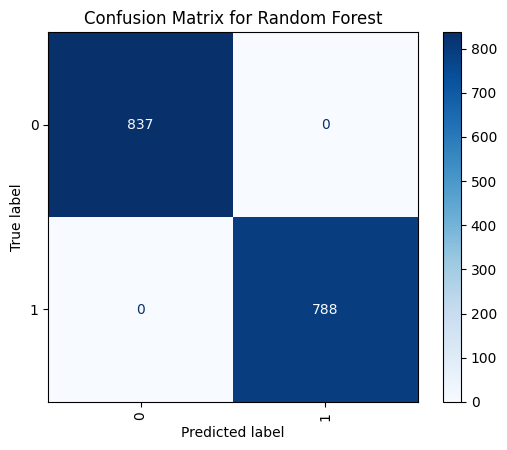

Train Accuracy: 1.0


In [42]:
print("Random Forest")
rf_param_grid = {
    'n_estimators': [20,50,100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
best_rf_model, best_rf_params, best_rf_accuracy, train_accuracy_rf = cross_validate_model(RandomForestClassifier(), rf_param_grid, "Random Forest", X_train, y_train)
display_confusion_matrix(best_rf_model, X_test, y_test, "Random Forest")
print("Train Accuracy:", train_accuracy_rf)

Knn


K-Nearest Neighbors
Best parameters for K-Nearest Neighbors: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation accuracy for K-Nearest Neighbors: 1.0
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       837
           1       1.00      1.00      1.00       788

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



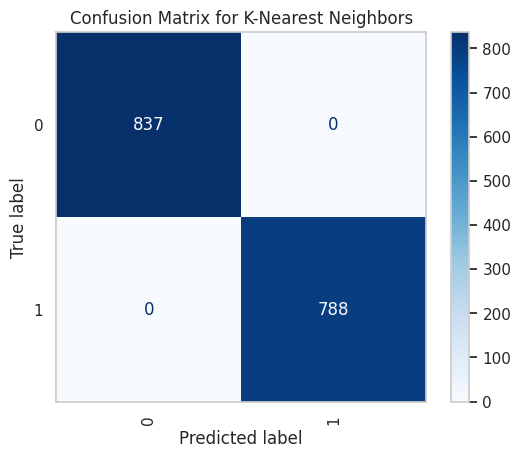

In [90]:
knn_param_grid = {
    'n_neighbors': [3, 5],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
print("\nK-Nearest Neighbors")
best_knn_model, best_knn_params, best_knn_accuracy, train_accuracy_knn = cross_validate_model(KNeighborsClassifier(), knn_param_grid, "K-Nearest Neighbors", X_train, y_train)
display_confusion_matrix(best_knn_model, X_test, y_test, "K-Nearest Neighbors")

Gaussian Naive Bayes Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      3371
           1       0.92      0.92      0.92      3128

    accuracy                           0.92      6499
   macro avg       0.92      0.92      0.92      6499
weighted avg       0.92      0.92      0.92      6499



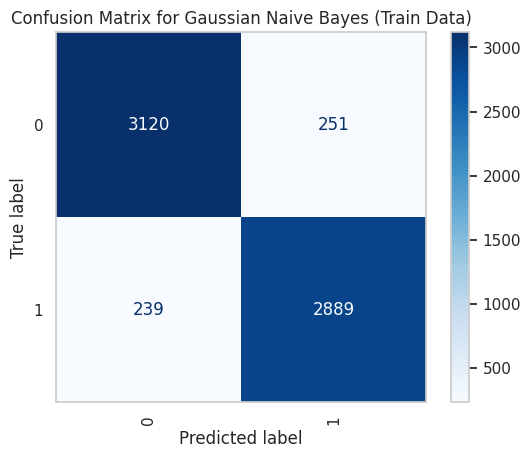

In [126]:
# Training the Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Making predictions
y_pred = gnb_model.predict(X_train)

# Display the confusion matrix
cm = confusion_matrix(y_train, y_pred)
print("Gaussian Naive Bayes Classification Report (Train Data):\n", classification_report(y_train, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title("Confusion Matrix for Gaussian Naive Bayes (Train Data)")
plt.grid(False)
plt.show()

Gaussian Naive Bayes Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       837
           1       0.92      0.92      0.92       788

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625



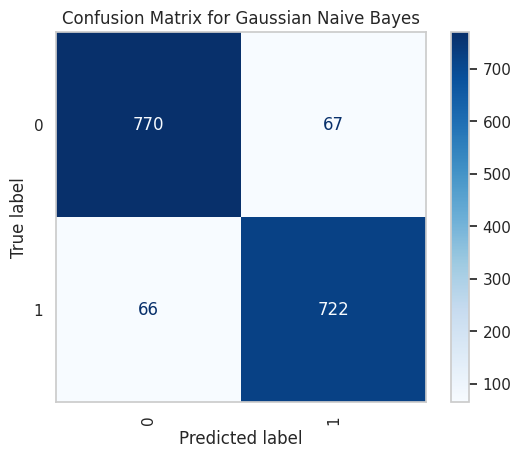

In [210]:
# Making the predictions on test data
y_pred_test = gnb_model.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred_test)
print("Gaussian Naive Bayes Classification Report (Test Data):\n", classification_report(y_test, y_pred_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title("Confusion Matrix for Gaussian Naive Bayes")
plt.grid(False)
plt.savefig("gnb_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

AdaBoost Classification Report (Test Data):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       837
           1       1.00      1.00      1.00       788

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



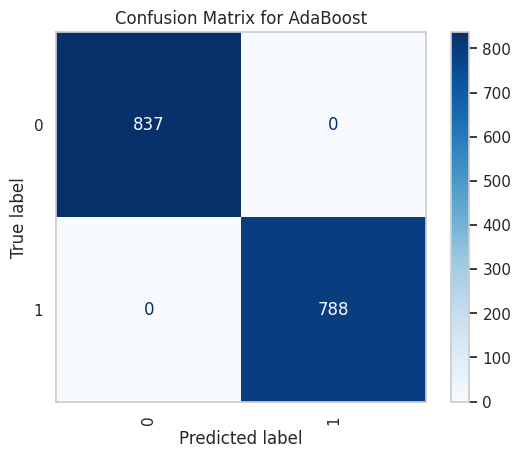

In [96]:
from sklearn.ensemble import AdaBoostClassifier

# Training the AdaBoost model on training data
ada_model = AdaBoostClassifier(n_estimators=100)
ada_model.fit(X_train, y_train)

# Making the predictions on test data
y_pred_test = ada_model.predict(X_test)


cm_test = confusion_matrix(y_test, y_pred_test)
print("AdaBoost Classification Report (Test Data):\n", classification_report(y_test, y_pred_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title("Confusion Matrix for AdaBoost")
plt.grid(False)
plt.show()


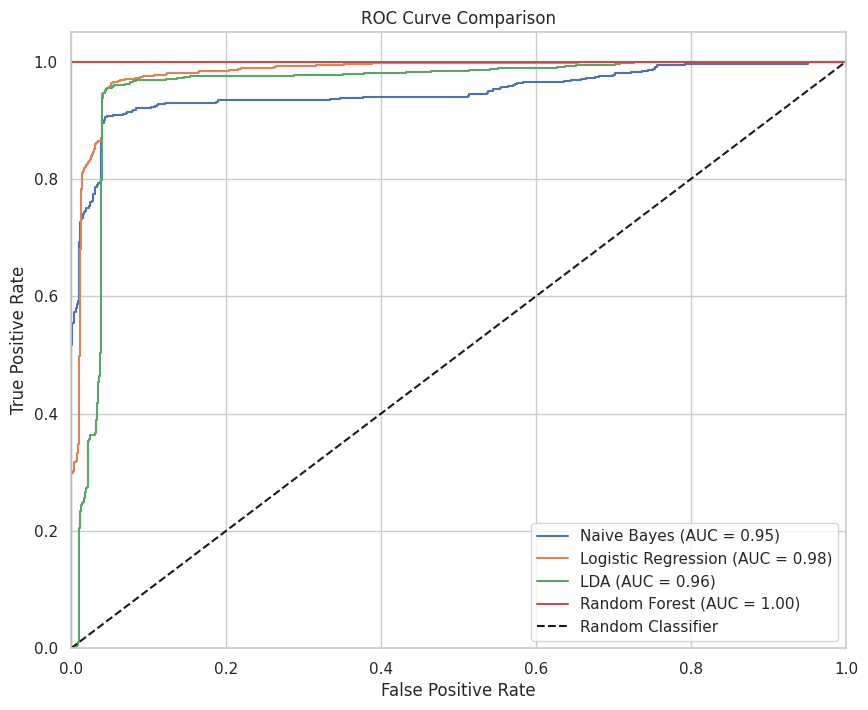

In [226]:
models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "LDA": LinearDiscriminantAnalysis(n_components=1),
    "Random Forest": RandomForestClassifier(n_estimators=20, random_state=42)
}

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Get the probabilities for the positive class
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)  # Calculate AUC
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")

# Add labels and legend
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")  # Diagonal line (no skill)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")

plt.savefig("roc_curve_comparison.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


Vedo che questi modelli sono molto efficienti, ma nella realtà un cercatore di funghi inesperto potrebbe non riuscire a distinguere le diverse tipologie di categorie delle variabili.
Vado quindi a selezionare le variabili che anche un cercatore inesperto riuscirebbe a riconoscere e vado a generare nuovi modelli, vedendo come cambiano le performance.


In [240]:
# Variabili selezionate:
# - cap-color
# - gill-color (colori delle lamelle)
# - stalk-shape (ingrossato alla base o assottigliato) (gambo)
# - stalk-color-above-ring
# - stalk-color-below-ring
# - ring-number

new_X = df[['cap-color', 'gill-color', 'stalk-shape', 'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-number']]

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, y, test_size=0.2, random_state=42)

In [241]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(new_X_train, new_y_train)
gnb_pred = gnb.predict(new_X_test)
accuracy = accuracy_score(new_y_test, gnb_pred)
print('Naive Bayes Model Accuracy:', accuracy)

Naive Bayes Model Accuracy: 0.7550769230769231


In [218]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(new_X_train, new_y_train)
log_reg_pred = log_reg.predict(new_X_test)
accuracy = accuracy_score(new_y_test, log_reg_pred)
print('Logistic Regression Model Accuracy:', accuracy)

Logistic Regression Model Accuracy: 0.8283076923076923


In [219]:
rf = RandomForestClassifier(random_state=42)
rf.fit(new_X_train, new_y_train)
rf_pred = rf.predict(new_X_test)
accuracy = accuracy_score(new_y_test, rf_pred)
print('Random Forest Model Accuracy:', accuracy)

Random Forest Model Accuracy: 0.9323076923076923


In [220]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(new_X_train, new_y_train)
rf_pred = rf.predict(new_X_test)
accuracy = accuracy_score(new_y_test, rf_pred)
print('Random Forest Model Accuracy:', accuracy)

Random Forest Model Accuracy: 0.9323076923076923


Random Forest
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 20}
Best cross-validation accuracy for Random Forest: 0.9399905252561143
Random Forest Classification Report:
              precision    recall  f1-score   support

      Edible       0.91      0.96      0.94       843
   Posionous       0.96      0.90      0.93       782

    accuracy                           0.93      1625
   macro avg       0.93      0.93      0.93      1625
weighted avg       0.93      0.93      0.93      1625



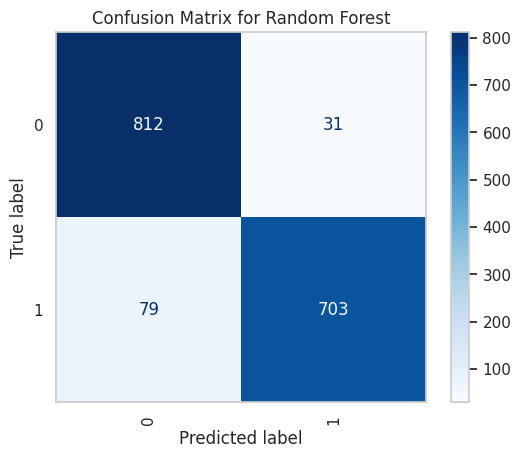

Training Accuracy: 0.9421449453762117


In [221]:
print("Random Forest")
rf_param_grid = {
    'n_estimators': [20,50,100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
best_rf_model, best_rf_params, best_rf_accuracy, train_accuracy_rf = cross_validate_model(RandomForestClassifier(), rf_param_grid, "Random Forest", new_X_train, new_y_train)
display_confusion_matrix(best_rf_model, new_X_test, new_y_test, "Random Forest")

print(f"Training Accuracy: {train_accuracy_rf}")


K-Nearest Neighbors
Best parameters for K-Nearest Neighbors: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation accuracy for K-Nearest Neighbors: 0.9275273287143957
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

      Edible       0.92      0.92      0.92       843
   Posionous       0.92      0.92      0.92       782

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625



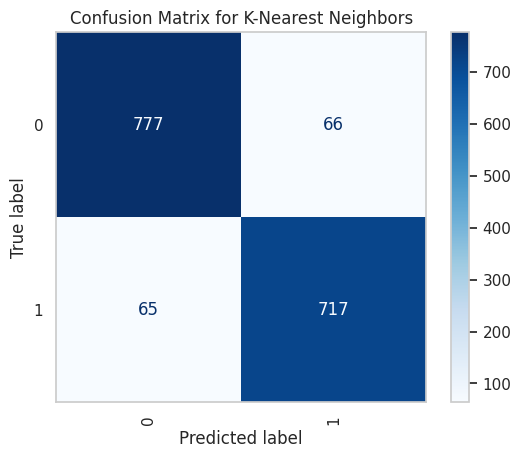

In [222]:
knn_param_grid = {
    'n_neighbors': [3, 5],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
print("\nK-Nearest Neighbors")
best_knn_model, best_knn_params, best_knn_accuracy, train_accuracy_knn = cross_validate_model(KNeighborsClassifier(), knn_param_grid, "K-Nearest Neighbors", new_X_train, new_y_train)
display_confusion_matrix(best_knn_model, new_X_test, new_y_test, "K-Nearest Neighbors")

Gaussian Naive Bayes Classification Report (Train Data):
               precision    recall  f1-score   support

      Edible       0.79      0.73      0.76      3365
   Posionous       0.73      0.79      0.76      3134

    accuracy                           0.76      6499
   macro avg       0.76      0.76      0.76      6499
weighted avg       0.76      0.76      0.76      6499



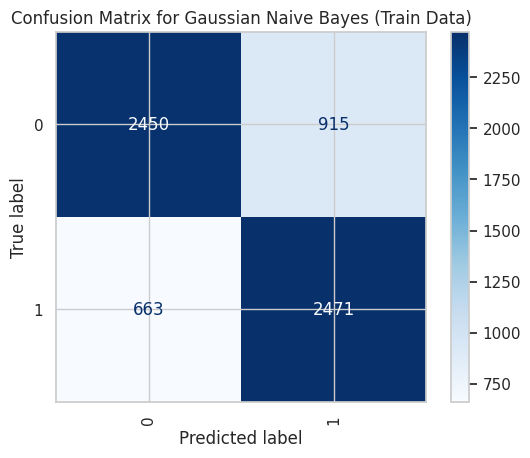

In [223]:
# Training the Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(new_X_train, new_y_train)

# Making predictions
y_pred = gnb_model.predict(new_X_train)

# Display the confusion matrix
cm = confusion_matrix(new_y_train, y_pred)
print("Gaussian Naive Bayes Classification Report (Train Data):\n", classification_report(new_y_train, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title("Confusion Matrix for Gaussian Naive Bayes (Train Data)")
plt.show()

Gaussian Naive Bayes Classification Report (Test Data):
               precision    recall  f1-score   support

      Edible       0.79      0.72      0.75       843
   Posionous       0.73      0.79      0.76       782

    accuracy                           0.76      1625
   macro avg       0.76      0.76      0.76      1625
weighted avg       0.76      0.76      0.76      1625



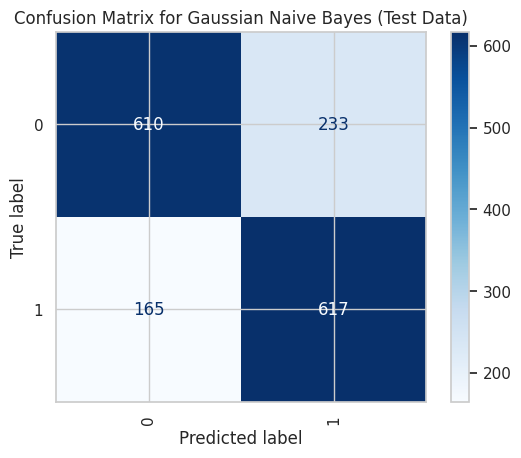

In [224]:
# Making the predictions on test data
y_pred_test = gnb_model.predict(new_X_test)

cm_test = confusion_matrix(new_y_test, y_pred_test)
print("Gaussian Naive Bayes Classification Report (Test Data):\n", classification_report(new_y_test, y_pred_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title("Confusion Matrix for Gaussian Naive Bayes (Test Data)")
plt.show()

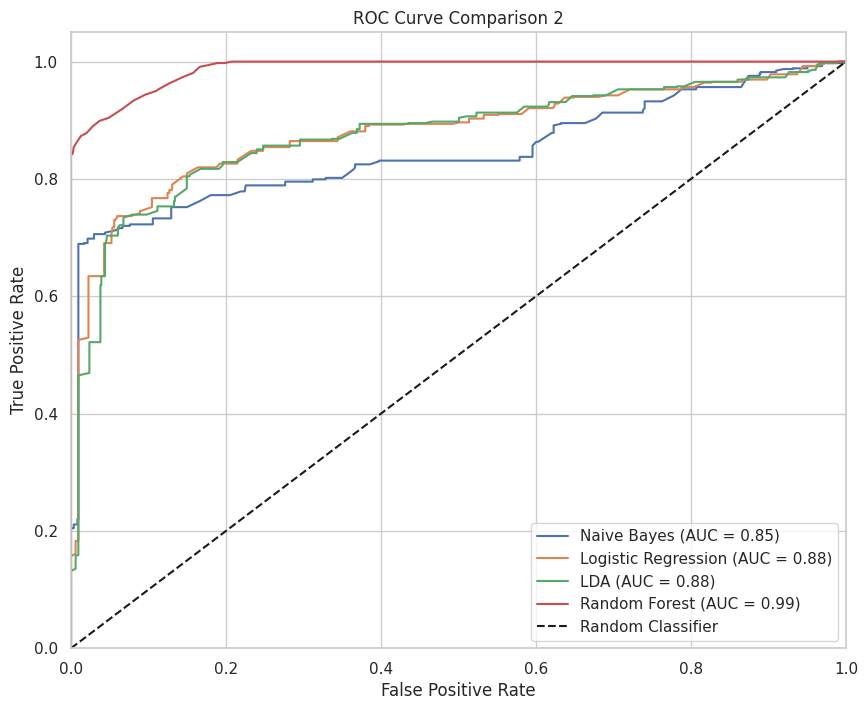

In [243]:
models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "LDA": LinearDiscriminantAnalysis(n_components=1),
    "Random Forest": RandomForestClassifier(max_depth=None, min_samples_split=3,n_estimators=20, random_state=42)
}

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    # Fit the model
    model.fit(new_X_train, new_y_train)
    
    # Get the probabilities for the positive class
    y_prob = model.predict_proba(new_X_test)[:, 1]  # Probability of the positive class
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(new_y_test, y_prob)
    auc = roc_auc_score(new_y_test, y_prob)  # Calculate AUC
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")

# Add labels and legend
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")  # Diagonal line (no skill)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison 2')
plt.legend(loc="lower right")

plt.savefig("roc_curve_comparison2.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


In [261]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(new_X_train)
X_test_scaled = scaler.transform(new_X_test)


model2 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(new_X_train.shape[1],)),  # Input Layer
    keras.layers.Dense(64, activation='relu'),  # Hidden Layer 1
    keras.layers.Dense(32, activation='relu'),  # Hidden Layer 2
    keras.layers.Dense(1, activation='sigmoid')  # Output Layer (sigmoid for binary classification)
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model2.summary()

/home/andrea/Desktop/UNI/INTRODUZIONE AL MACHINE LEARNING/PROGETTO/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,265 (44.00 KB)

 Trainable params: 11,265 (44.00 KB)

 Non-trainable params: 0 (0.00 B)

In [262]:
history = model2.fit(new_X_train, new_y_train, epochs=30, batch_size=32, validation_data=(new_X_test, new_y_test))

Epoch 1/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7779 - loss: 0.4761 - val_accuracy: 0.8535 - val_loss: 0.3121
Epoch 2/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8614 - loss: 0.2995 - val_accuracy: 0.8683 - val_loss: 0.2805
Epoch 3/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8883 - loss: 0.2500 - val_accuracy: 0.8954 - val_loss: 0.2595
Epoch 4/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8960 - loss: 0.2448 - val_accuracy: 0.8769 - val_loss: 0.2641
Epoch 5/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9050 - loss: 0.2217 - val_accuracy: 0.8978 - val_loss: 0.2428
Epoch 6/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9013 - loss: 0.2259 - val_accuracy: 0.8658 - val_loss: 0.2666
Epoch 7/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9030 - loss: 0.2179 - val_accuracy: 0.8985 - val_loss: 0.2244
Epoch 8/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8955 - loss: 0.2237 - val_accuracy: 0.

In [263]:
# Evaluate on test data
test_loss, test_accuracy = model2.evaluate(new_X_test, new_y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9104 - loss: 0.1682
Test Accuracy: 0.9145


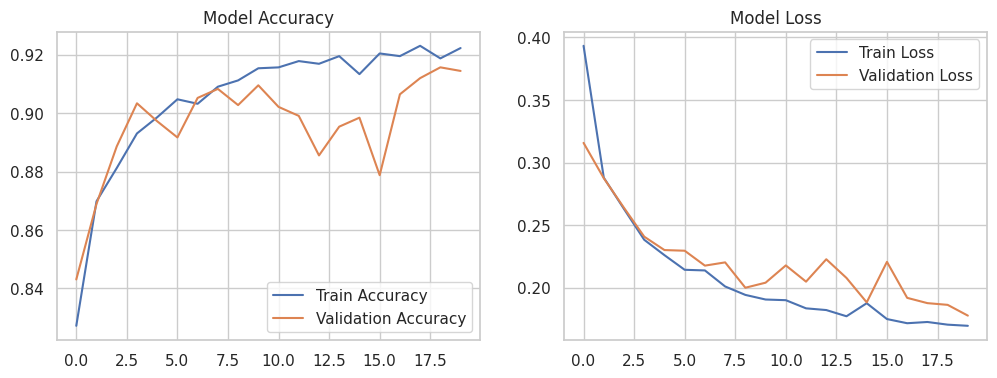

In [254]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")

plt.show()

In [256]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(new_X_train)
X_test_scaled = scaler.transform(new_X_test)


model3 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(new_X_train.shape[1],)),  # Input Layer
    keras.layers.Dense(256, activation='relu'),  # Hidden Layer 1
    keras.layers.Dense(128, activation='relu'),  # Hidden Layer 2
    keras.layers.Dense(1, activation='sigmoid')  # Output Layer (sigmoid for binary classification)
])

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model3.summary()

history = model3.fit(new_X_train, new_y_train, epochs=20, batch_size=32, validation_data=(new_X_test, new_y_test))

/home/andrea/Desktop/UNI/INTRODUZIONE AL MACHINE LEARNING/PROGETTO/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,945 (261.50 KB)

 Trainable params: 66,945 (261.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7997 - loss: 0.4135 - val_accuracy: 0.8597 - val_loss: 0.2958
Epoch 2/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8720 - loss: 0.2707 - val_accuracy: 0.8560 - val_loss: 0.2937
Epoch 3/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8810 - loss: 0.2583 - val_accuracy: 0.8843 - val_loss: 0.2509
Epoch 4/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9025 - loss: 0.2211 - val_accuracy: 0.9022 - val_loss: 0.2549
Epoch 5/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9064 - loss: 0.2117 - val_accuracy: 0.8751 - val_loss: 0.2671
Epoch 6/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9056 - loss: 0.2190 - val_accuracy: 0.9083 - val_loss: 0.2213
Epoch 7/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8993 - loss: 0.2228 - val_accuracy: 0.9065 - val_loss: 0.2066
Epoch 8/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9051 - loss: 0.2023 - val_accuracy: 0.

In [259]:
# Evaluate on test data
test_loss, test_accuracy = model3.evaluate(new_X_test, new_y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9160 - loss: 0.1509
Test Accuracy: 0.9175


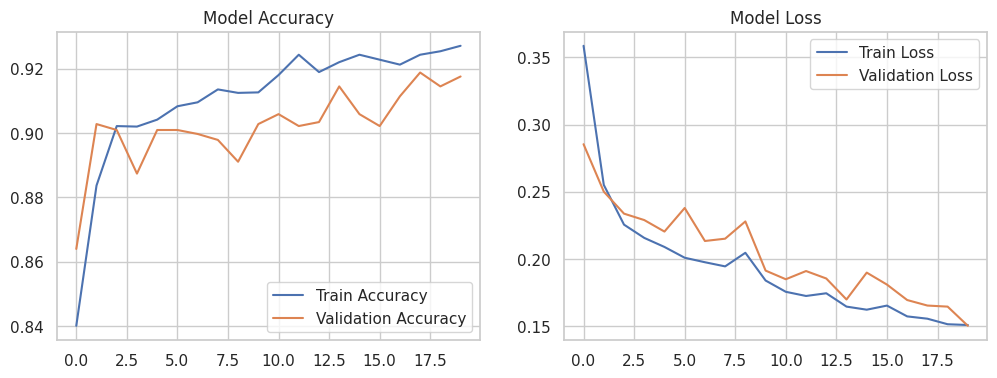

In [260]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")

plt.show()

In [258]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(new_X_train)
X_test_scaled = scaler.transform(new_X_test)


model3 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(new_X_train.shape[1],)),  # Input Layer
    keras.layers.Dense(256, activation='relu'),  # Hidden Layer 1
    keras.layers.Dense(128, activation='relu'),  # Hidden Layer 2
    keras.layers.Dense(1, activation='sigmoid')  # Output Layer (sigmoid for binary classification)
])

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model3.summary()

history = model3.fit(new_X_train, new_y_train, epochs=20, batch_size=32, validation_data=(new_X_test, new_y_test))

/home/andrea/Desktop/UNI/INTRODUZIONE AL MACHINE LEARNING/PROGETTO/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,945 (261.50 KB)

 Trainable params: 66,945 (261.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8067 - loss: 0.4243 - val_accuracy: 0.8640 - val_loss: 0.2854
Epoch 2/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8798 - loss: 0.2639 - val_accuracy: 0.9028 - val_loss: 0.2502
Epoch 3/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9004 - loss: 0.2320 - val_accuracy: 0.9009 - val_loss: 0.2338
Epoch 4/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9052 - loss: 0.2108 - val_accuracy: 0.8874 - val_loss: 0.2291
Epoch 5/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9017 - loss: 0.2092 - val_accuracy: 0.9009 - val_loss: 0.2205
Epoch 6/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9042 - loss: 0.2044 - val_accuracy: 0.9009 - val_loss: 0.2380
Epoch 7/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9090 - loss: 0.1923 - val_accuracy: 0.8997 - val_loss: 0.2135
Epoch 8/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9157 - loss: 0.1945 - val_accuracy: 0.

Neural Network

In [244]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input Layer
    keras.layers.Dense(64, activation='relu'),  # Hidden Layer 1
    keras.layers.Dense(32, activation='relu'),  # Hidden Layer 2
    keras.layers.Dense(1, activation='sigmoid')  # Output Layer (sigmoid for binary classification)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

/home/andrea/Desktop/UNI/INTRODUZIONE AL MACHINE LEARNING/PROGETTO/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-11 15:01:22.564113: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 13,185 (51.50 KB)

 Non-trainable params: 0 (0.00 B)

In [245]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8613 - loss: 0.3237 - val_accuracy: 0.9686 - val_loss: 0.0904
Epoch 2/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9750 - loss: 0.0748 - val_accuracy: 0.9569 - val_loss: 0.0927
Epoch 3/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9919 - loss: 0.0250 - val_accuracy: 0.9994 - val_loss: 0.0054
Epoch 4/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9982 - loss: 0.0082 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 5/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9980 - loss: 0.0081 - val_accuracy: 0.9994 - val_loss: 0.0033
Epoch 6/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9992 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 9.3974e-04
Epoch 7/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 6.8416e-04 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 8/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9983 - loss: 0.0057 - val_accu

In [119]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 3.2491e-05 
Test Accuracy: 1.0000


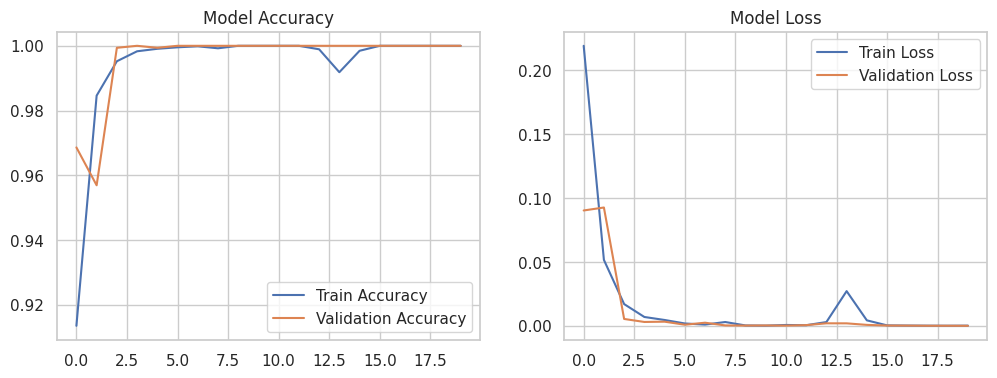

In [246]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")

plt.show()


### Verifico il nuovo dataset

In [264]:
# import csv file primary_data.csv
data_2 = pd.read_csv('MushroomDataset/secondary_data.csv', delimiter=";")

#data_2 = data_2.dropna(thresh=30000, axis=1) # drop columns with more than 30000 missing values
print(data_2.shape)

(61069, 21)


Fai la stessa cosa su questo dataset, prova a selezionare le variabili più semplici e vedi le differenze tra modelli.

In [76]:
data_2.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


Come prima seleziono le variabili che anche un raccoglitore non esperto saprebbe riconoscere.

Queste sono: cap-diameter, cap-color, does-bruise-or-bleed, gill-spacing, gill-color, stem-height, stem-width, stem-color, has-ring, habitat, season

In [265]:
# new data with only this columns class, cap-diameter, cap-color, does-bruise-or-bleed, gill-spacing, gill-color, stem-height, stem-width, stem-color, has-ring, habitat, season
data_2 = data_2[['class', 'cap-diameter', 'cap-color', 'does-bruise-or-bleed', 'gill-spacing', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'has-ring', 'habitat', 'season']]

In [266]:
data_2.head()

,class,cap-diameter,cap-color,does-bruise-or-bleed,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
0,p,15.26,o,f,NaN,w,16.95,17.09,w,t,d,w
1,p,16.60,o,f,NaN,w,17.99,18.19,w,t,d,u
2,p,14.07,o,f,NaN,w,17.80,17.74,w,t,d,w
3,p,14.17,e,f,NaN,w,15.77,15.98,w,t,d,w
4,p,14.64,o,f,NaN,w,16.53,17.20,w,t,d,w


In [79]:
for i in data_2.columns:
    print(data_2[i].unique())

['p' 'e']
[15.26 16.6  14.07 ... 22.85 21.8  20.42]
['o' 'e' 'n' 'g' 'r' 'w' 'y' 'p' 'u' 'b' 'l' 'k']
['f' 't']
[nan 'c' 'd' 'f']
['w' 'n' 'p' 'u' 'b' 'g' 'y' 'r' 'e' 'o' 'k' 'f']
[16.95 17.99 17.8  ...  1.23  1.16  0.  ]
[17.09 18.19 17.74 ... 32.59 30.99 30.51]
['w' 'y' 'n' 'u' 'b' 'l' 'r' 'p' 'e' 'k' 'g' 'o' 'f']
['t' 'f']
['d' 'm' 'g' 'h' 'l' 'p' 'w' 'u']
['w' 'u' 'a' 's']


In [267]:
# count of gill-spacing column
data_2['gill-spacing'].value_counts()

gill-spacing
c    24710
d     7766
f     3530
Name: count, dtype: int64

In [81]:
data_2.dtypes

class                    object
cap-diameter            float64
cap-color                object
does-bruise-or-bleed     object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-color               object
has-ring                 object
habitat                  object
season                   object
dtype: object

In [82]:
data_2.isnull().sum()

class                       0
cap-diameter                0
cap-color                   0
does-bruise-or-bleed        0
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
habitat                     0
season                      0
dtype: int64

In [268]:
# sostiutisco i valori mancanti con la moda
data_2['gill-spacing'].fillna(data_2['gill-spacing'].mode()[0], inplace=True)

/tmp/ipykernel_18314/2612192470.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_2['gill-spacing'].fillna(data_2['gill-spacing'].mode()[0], inplace=True)


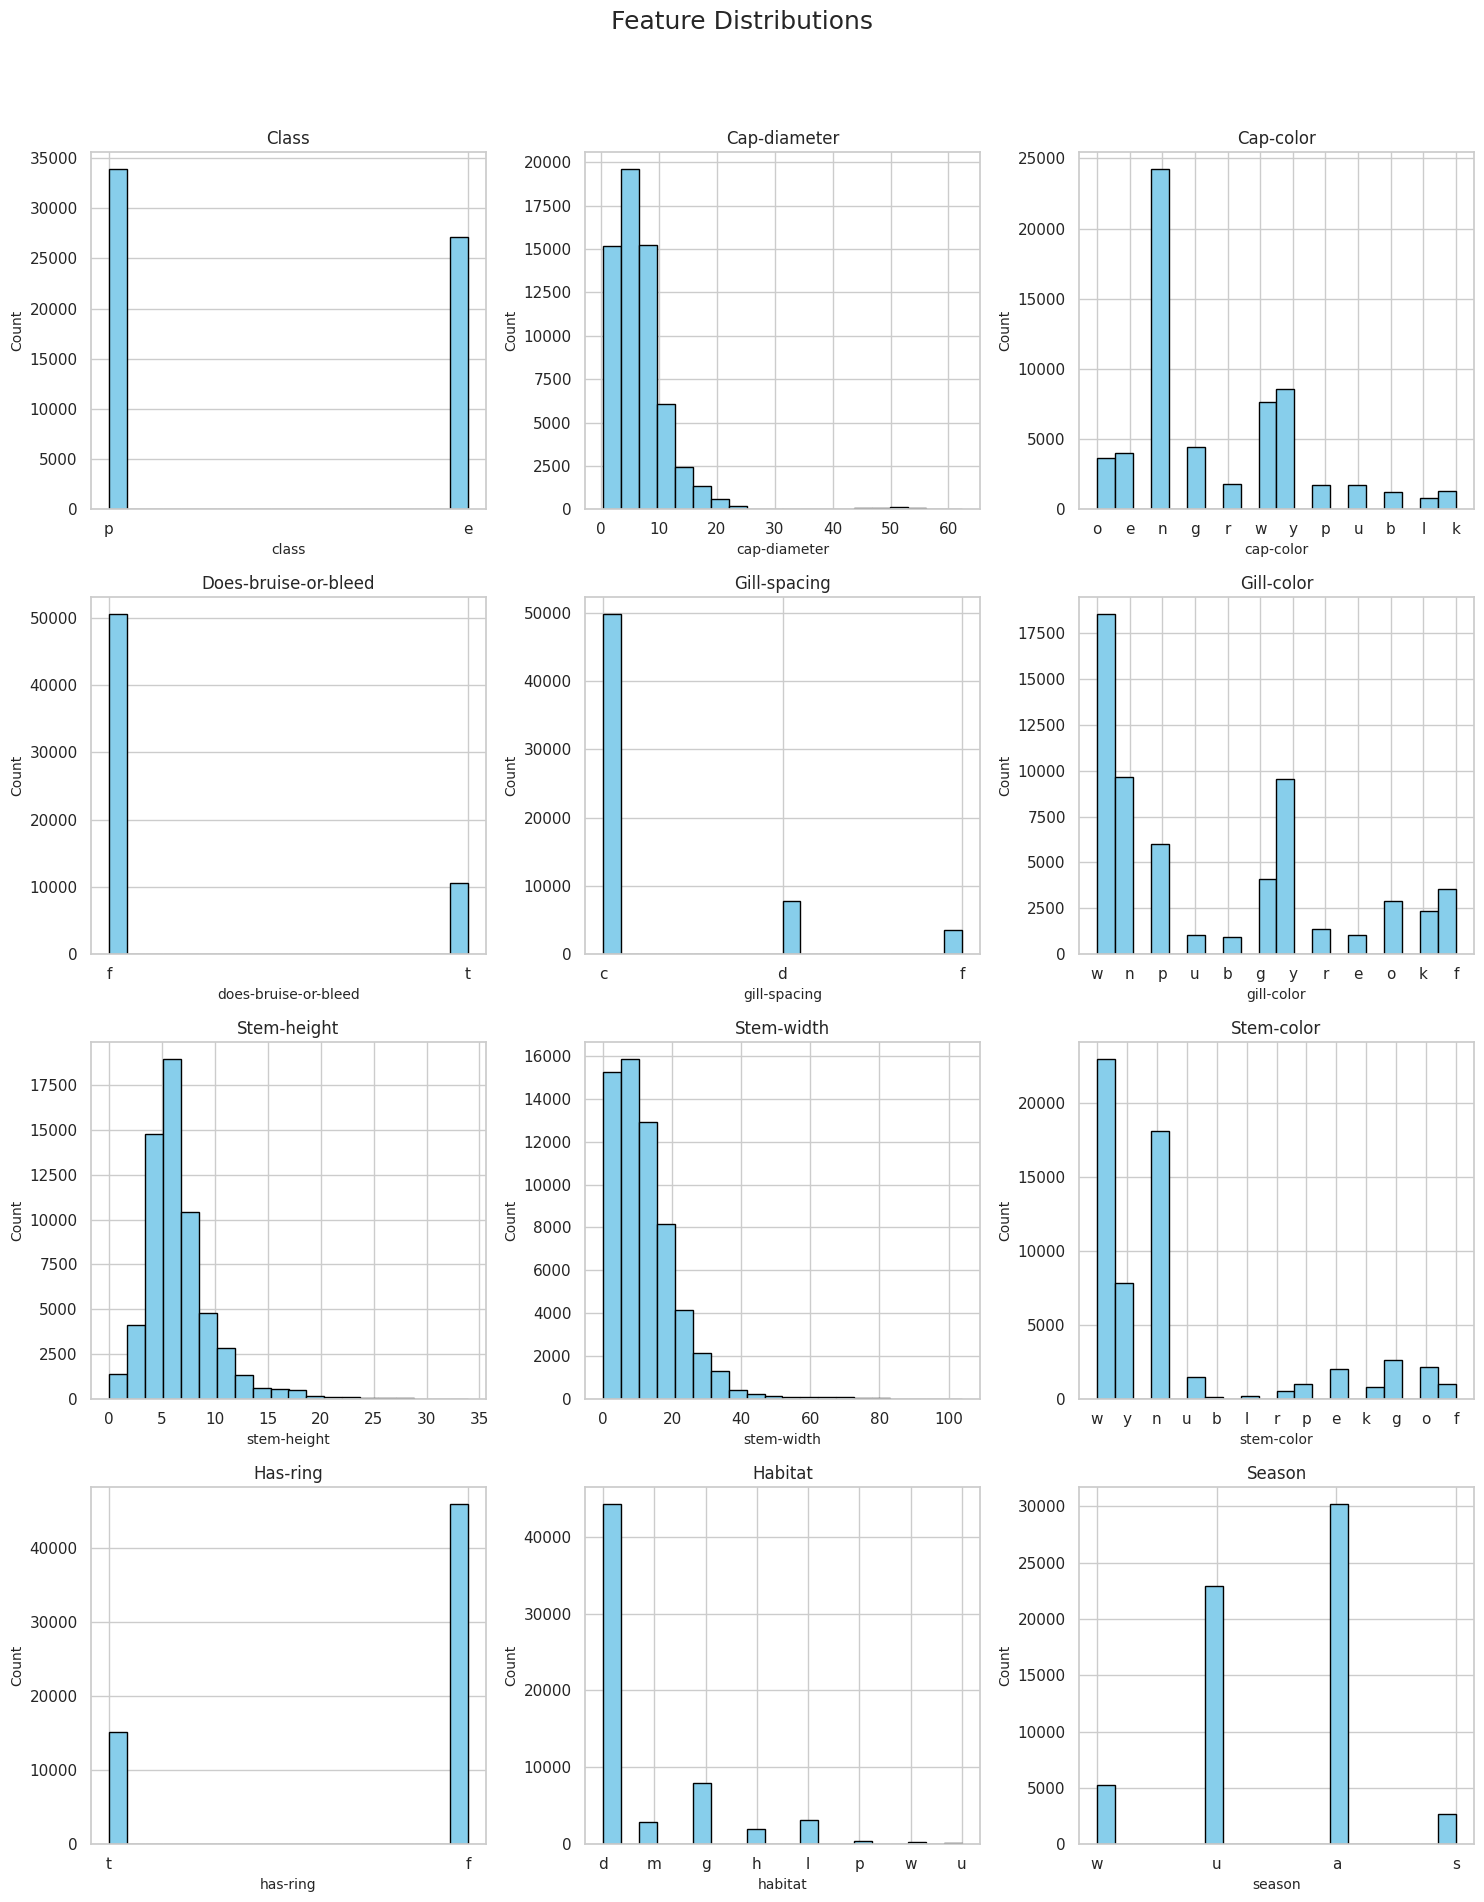

In [269]:
features = data_2.columns

# Set up the figure grid based on the number of features
n_rows = (len(features) + 2) // 3  # Dynamically calculate rows for a 3-column layout
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows))
fig.suptitle("Feature Distributions", fontsize=18)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each feature
for i, feature in enumerate(features):
    axes[i].hist(data_2[feature], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(feature.capitalize(), fontsize=12)
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel("Count", fontsize=10)

# Remove any unused subplots
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [284]:
numerical_data = data_2.select_dtypes(include=[np.number])
categorical_data = data_2.select_dtypes(exclude=[np.number])

y = data_2['class']
y = y.replace('p', 1)
y = y.replace('e', 0)

/tmp/ipykernel_18314/3083317961.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace('e', 0)


Data con one hot encoding (56 variabili)

In [271]:
categorical_data = categorical_data.drop('class', axis=1)
categorical_data_one = pd.get_dummies(categorical_data) # One hot encoding

In [272]:
categorical_data_one.shape

(61069, 56)

Data con label encoding (8 variabili)

In [273]:
categorical_data_two = categorical_data.apply(LabelEncoder().fit_transform) # Label encoding

In [274]:
categorical_data_two.shape

(61069, 8)

Data con category encoder

In [275]:
import category_encoders as ce 

encoder = ce.BinaryEncoder(cols=categorical_data.columns)
categorical_data_three = encoder.fit_transform(categorical_data)

categorical_data_three.shape

(61069, 25)

In [285]:
X = pd.concat([numerical_data, categorical_data_one], axis=1)

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modelling on larger dataset

In [278]:
def models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Naive Bayes
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Naive Bayes Model Accuracy:', accuracy)

    # Logistic Regression
    log_reg = LogisticRegression(max_iter=10000)
    log_reg.fit(X_train, y_train)
    log_reg_pred = log_reg.predict(X_test)

    print('Logistic Regression Accuracy:', log_reg.score(X_test, y_test))

    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(n_components=1)
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)

    clf = LogisticRegression()
    clf.fit(X_train_lda, y_train)

    # Make Predictions
    y_pred = clf.predict(X_test_lda)

    # Evaluate Model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Linear Discriminant Analysis Accuracy: {accuracy}")

    # Decision Tree
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)
    dt_pred = dt.predict(X_test)
    accuracy = accuracy_score(y_test, dt_pred)
    print('Decision Tree Model Accuracy:', accuracy)

    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, rf_pred)
    print('Random Forest Model Accuracy:', accuracy)

Modelli con one hot encoding (56 var)

In [279]:
models(X, y)

Naive Bayes Model Accuracy: 0.6611265760602587
Logistic Regression Accuracy: 0.7091861797936794
Linear Discriminant Analysis Accuracy: 0.7074668413296218
Decision Tree Model Accuracy: 0.9894383494350745
Random Forest Model Accuracy: 0.9962338300311119


Modelli con label encoding

In [280]:
models(pd.concat([numerical_data, categorical_data_two], axis=1), y)

Naive Bayes Model Accuracy: 0.5802357949893565
Logistic Regression Accuracy: 0.6296053708858687
Linear Discriminant Analysis Accuracy: 0.6303422302276077
Decision Tree Model Accuracy: 0.983297854920583
Random Forest Model Accuracy: 0.9952513509087932


Modelli con category encoder

In [281]:
models(pd.concat([numerical_data, categorical_data_three], axis=1), y)

Naive Bayes Model Accuracy: 0.5871950221057802
Logistic Regression Accuracy: 0.6500736859341739
Linear Discriminant Analysis Accuracy: 0.6508105452759129
Decision Tree Model Accuracy: 0.9861634190273457
Random Forest Model Accuracy: 0.9962338300311119



K-Nearest Neighbors
Best parameters for K-Nearest Neighbors: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation accuracy for K-Nearest Neighbors: 0.9946985978917204
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5374
           1       1.00      0.99      1.00      6840

    accuracy                           0.99     12214
   macro avg       0.99      0.99      0.99     12214
weighted avg       0.99      0.99      0.99     12214



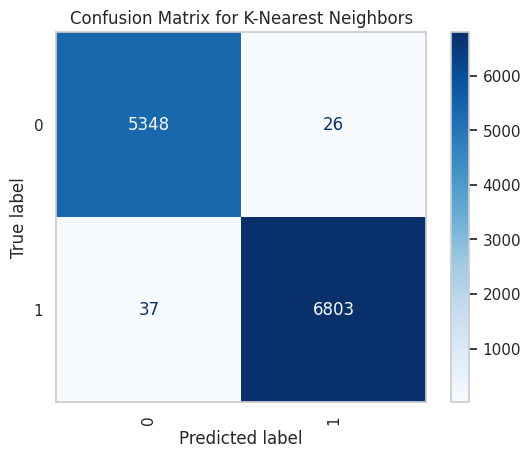

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn_param_grid = {
    'n_neighbors': [3, 5],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
print("\nK-Nearest Neighbors")
best_knn_model, best_knn_params, best_knn_accuracy, train_accuracy_knn = cross_validate_model(KNeighborsClassifier(), knn_param_grid, "K-Nearest Neighbors", X_train, y_train)
display_confusion_matrix(best_knn_model, X_test, y_test, "K-Nearest Neighbors")

Seleziono 2° dataset

In [287]:
X = pd.concat([numerical_data, categorical_data_two], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [288]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [289]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input Layer
    keras.layers.Dense(64, activation='relu'),  # Hidden Layer 1
    keras.layers.Dense(32, activation='relu'),  # Hidden Layer 2
    keras.layers.Dense(1, activation='sigmoid')  # Output Layer (sigmoid for binary classification)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

/home/andrea/Desktop/UNI/INTRODUZIONE AL MACHINE LEARNING/PROGETTO/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,905 (46.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
# noto che usando categorical_data_two il modello ha una accuracy minore, rispetto a categorical_data_three
# questo dovuto al fatto che categorical_data due ha molte colonne in meno rispetto a categorical_data_three
# mantengo categorical_data_two in quanto meno complessa

In [290]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7094 - loss: 0.5509 - val_accuracy: 0.8620 - val_loss: 0.3134
Epoch 2/20
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8841 - loss: 0.2822 - val_accuracy: 0.9080 - val_loss: 0.2146
Epoch 3/20
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9236 - loss: 0.1926 - val_accuracy: 0.9306 - val_loss: 0.1778
Epoch 4/20
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9454 - loss: 0.1388 - val_accuracy: 0.9555 - val_loss: 0.1199
Epoch 5/20
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9571 - loss: 0.1143 - val_accuracy: 0.9549 - val_loss: 0.1173
Epoch 6/20
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9625 - loss: 0.1000 - val_accuracy: 0.9456 - val_loss: 0.1369
Epoch 7/20
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9637 - loss: 0.0937 - val_accuracy: 0.9636 - val_loss: 0.1107
Epoch 8/20
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9692 - loss: 0.0826 -

In [291]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9826 - loss: 0.0504
Test Accuracy: 0.9815


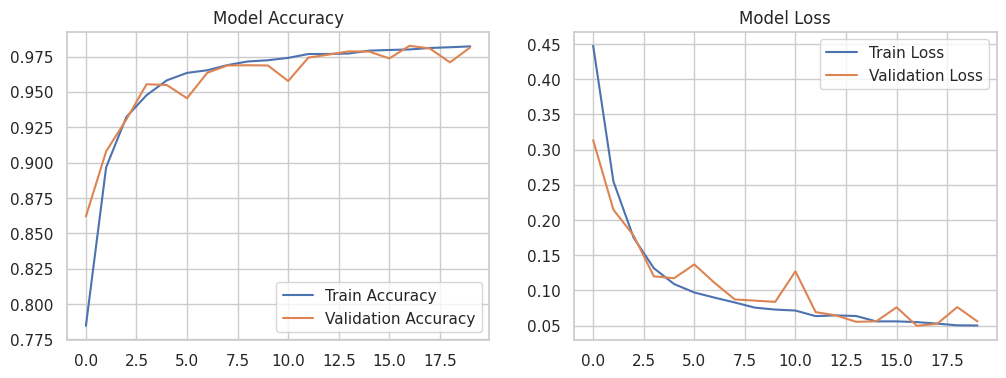

In [292]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")

plt.show()


In [121]:
dd = pd.concat([numerical_data, categorical_data_two, y], axis=1)

In [122]:
df_corr = dd.corr()['class'][:-1] # -1 to remove the last row which is class
df_corr.sort_values()

has-ring               -0.503876
stem-height            -0.384669
cap-diameter           -0.272871
stem-width             -0.224057
stem-color             -0.205084
gill-color             -0.197268
cap-color              -0.145857
does-bruise-or-bleed   -0.140195
season                  0.037531
gill-spacing            0.245494
habitat                 0.259058
Name: class, dtype: float64

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [47]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential

# Define the model with an explicit Input layer
model_ANN = Sequential([  # Explicitly defining the input shape
    Dense(2, activation='relu'),
    Dense(50, activation='relu'),
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_ANN.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit the model
model_ANN.fit(X_train_scaled, y_train, epochs=70)

Epoch 1/70
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6095 - loss: 0.6534
Epoch 2/70
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6477 - loss: 0.5978
Epoch 3/70
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - accuracy: 0.6513 - loss: 0.5861
Epoch 4/70
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step - accuracy: 0.6540 - loss: 0.5809
Epoch 5/70
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 2s 975us/step - accuracy: 0.6502 - loss: 0.5807
Epoch 6/70
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6526 - loss: 0.5771
Epoch 7/70
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6467 - loss: 0.5794
Epoch 8/70
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - accuracy: 0.6481 - loss: 0.5754
Epoch 9/70
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step - accuracy: 0.6536 - loss: 0.5745
Epoch 10/70
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - accuracy: 0.6559 - loss: 0.5719
Epoch 11/70
1527/1527 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6624 - loss: 0.5642
Epoch 12/70
1527/1

UNSUPERVISED

In [ ]:
# import data .data file
data = pd.read_csv('MUSHROOM 8000/agaricus-lepiota.data', header=None)
data = data.drop([16], axis=1)
data.columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 
                'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number',
                'ring-type', 'spore-print-color', 'population', 'habitat']

In [170]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


In [185]:
# Splite the featuers and target in two variables.
X = data.drop('class', axis=1)
y = data['class']

# For the sake of visualization, then I'll return it by hot-encoding.
y = y.map({'p': 'Posionous', 'e': 'Edible'}) 

X_dummy = pd.get_dummies(X, drop_first=True)
X_dummy.sample(5)

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
2295,False,True,False,False,False,False,True,False,False,False,...,False,True,False,False,True,False,False,False,False,False
6081,False,False,False,False,True,False,True,False,False,True,...,False,False,True,False,False,False,False,False,False,False
7162,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,True,False,False,False,False,False
4700,False,True,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
7633,False,True,False,False,False,False,False,True,False,True,...,False,False,True,False,False,False,False,True,False,False


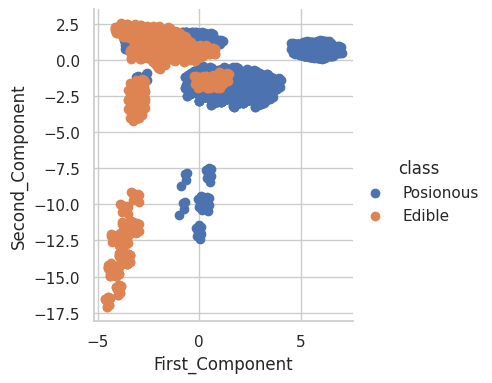

In [188]:
X_std = StandardScaler().fit_transform(X_dummy)

# Reduce 95 features to 2 features to visualize it.
X_pca = PCA(n_components=2).fit_transform(X_std)

X_pca = np.vstack((X_pca.T, y)).T

df_pca = pd.DataFrame(X_pca, columns=['First_Component',
                                      'Second_Component',
                                      'class'])
sns.FacetGrid(data=df_pca, hue='class', height=4).map(plt.scatter, 'First_Component', 'Second_Component').add_legend()

Notiamo che PCA non lavora molto bene, in quanto c'è tanto overlapping tra i punti nei due cluster.

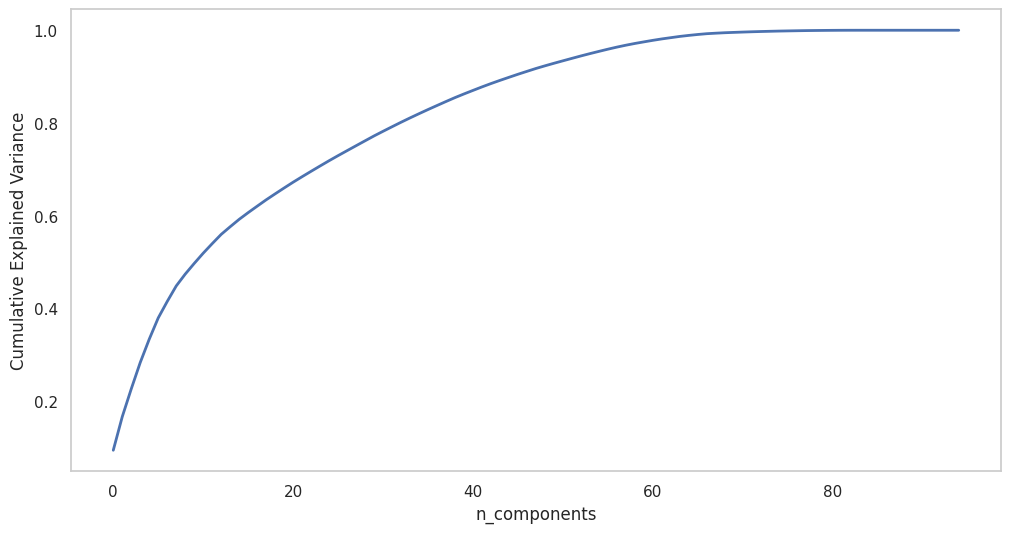

In [189]:
pca = PCA(n_components=95)
X_pca = pca.fit_transform(X_std)

percent_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percent_var_explained)

plt.figure(1, figsize=(12, 6))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative Explained Variance')

Noto che usando 60 componenti il 98% dell'informazione dei dati viene mantenuta.

TSNE

In [190]:
from sklearn.manifold import TSNE

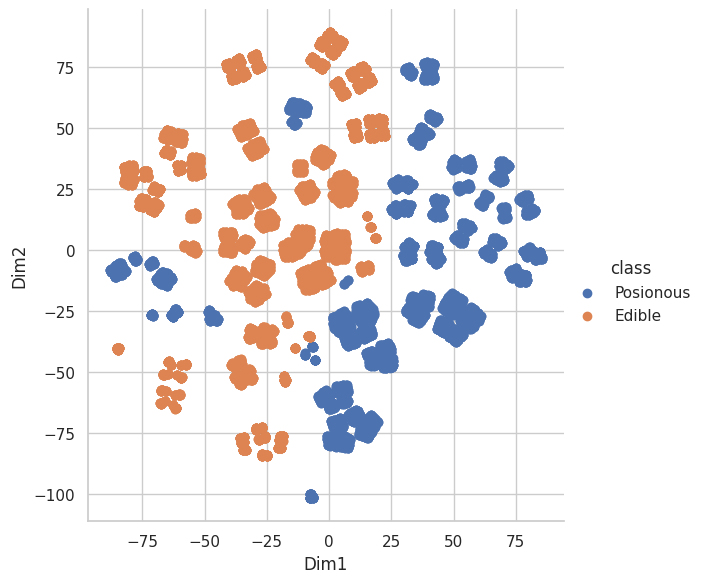

In [192]:
tsne = TSNE(n_components=2, random_state=42)

X_tsne = tsne.fit_transform(X_std)

# Create the dataframe to plot
X_tsne_data = np.vstack((X_tsne.T, y)).T
df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1', 'Dim2', 'class'])

# Plot the 2 components from t-SNE
sns.FacetGrid(df_tsne, hue='class', height=6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()

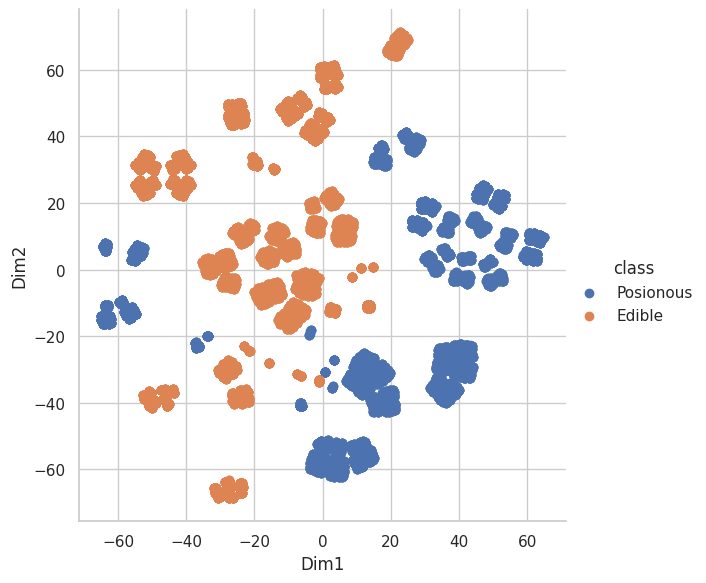

In [193]:
tsne = TSNE(n_components=2, perplexity=70,random_state=42)

X_tsne = tsne.fit_transform(X_std)

# Create the dataframe to plot
X_tsne_data = np.vstack((X_tsne.T, y)).T
df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1', 'Dim2', 'class'])

# Plot the 2 components from t-SNE
sns.FacetGrid(df_tsne, hue='class', height=6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()